In [73]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans, KShape, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import import_ipynb
import sklearn
import tslearn
from concurrent.futures import ProcessPoolExecutor
import os
import pickle
import time
from sklearn.metrics import silhouette_samples
from tslearn.metrics import cdist_soft_dtw_normalized, cdist_dtw
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering

In [2]:
import Prepare_time_series as pts

importing Jupyter notebook from Prepare time series.ipynb


In [3]:
np.set_printoptions(suppress=True, precision=5)

In [4]:
pts.sciezki=["../Dane/Fasta/Borrelia/GCF_000008685.2_ASM868v2_cds_from_genomic.fna"]

In [11]:
szeregi=np.array(pts.przygotujSzeregiCzasowe(50,256))
szeregi=szeregi.reshape(*szeregi.shape)

KatalogPickli="Pickle"

In [ ]:
with open(os.path.join(KatalogPickli, "borrelia-odleglosciMiedzySzeregami-normalized-softdtw"), "rb") as plik:
    odl=pickle.load(plik)

In [31]:
szeregi.shape

(1353, 206)

### KMeans 

In [38]:
kmeans=KMeans(7)
predictKMeans=kmeans.fit_predict(szeregi)

In [39]:
np.unique(predictKMeans, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([198, 200,  85, 249, 229, 228, 164]))

In [40]:
silhouette_score(odl, predictKMeans, metric="precomputed")

0.22218219091998356

### SpectralClustering

In [41]:
spectral=SpectralClustering(7)
predictSpectral=spectral.fit_predict(szeregi)

In [42]:
np.unique(predictSpectral, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([163, 163, 139, 250, 190, 246, 202]))

In [43]:
silhouette_score(odl, predictSpectral, metric="precomputed")

0.1252149133452725

### Agglomerative Clustering

In [74]:
agglomerative=AgglomerativeClustering(7)
predictAgglomerative=agglomerative.fit_predict(szeregi)

In [75]:
np.unique(predictAgglomerative, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([414, 251, 327, 104,  43, 104, 110]))

In [76]:
silhouette_score(odl, predictAgglomerative, metric="precomputed")

0.12867243806856785

# Wykresy wygładzone

In [12]:
szeregi=np.array(pts.przygotujSzeregiCzasowe(50,306))
szeregi=szeregi.reshape(*szeregi.shape)

KatalogPickli="Pickle"

In [6]:
with open("Pickle/Borrelia-wygladzone.pickle","rb") as file:
    szeregiWyg=pickle.load(file)
szeregiWyg=szeregiWyg.reshape(szeregiWyg.shape[:-1])
szeregiWyg*=(0.0713-0.0018)
szeregiWyg+=0.0018

In [7]:
szeregiWyg.shape

(1353, 256)

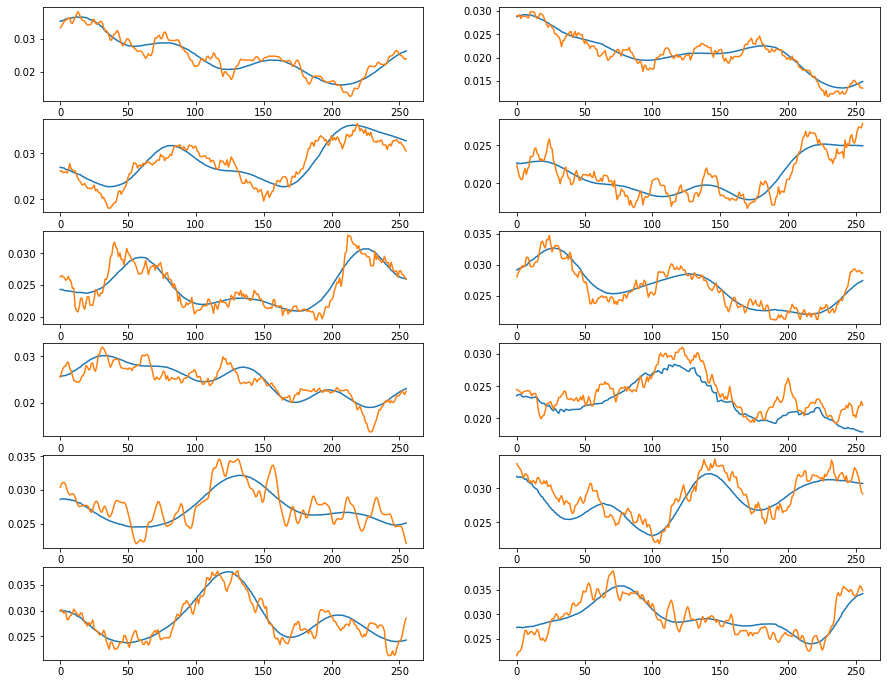

In [15]:
plt.gcf().set_size_inches((15,12))
for i in range(12):
    plt.subplot(6,2,i+1)
    plt.plot(szeregiWyg[i,:], label="wygladzone")
    plt.plot(szeregi[i,:], label="orginalny")

### Soft DTW

In [16]:
%%time
odlSoftDtw=cdist_soft_dtw_normalized(szeregiWyg, szeregiWyg)

CPU times: user 2h 45min 16s, sys: 1.62 s, total: 2h 45min 17s
Wall time: 11h 3min 54s


In [18]:
with open("Pickle/borrelia-wygladzone-odleglosciMiedzySzeregami-normalized-softdtw","wb") as file:
    pickle.dump(odlSoftDtw, file)

In [89]:
tsKmeans=TimeSeriesKMeans(7, metric="softdtw",verbose=10)
tsKmeasnEtyk=tsKmeans.fit_predict(szeregiWyg)

199060.678 --> 199062.217 --> 199062.648 --> 199062.816 --> 199062.916 --> 199063.018 --> 199063.069 --> 199063.093 --> 199063.113 --> 199063.147 --> 199063.179 --> 199063.199 --> 199063.208 --> 199063.214 --> 199063.216 --> 199063.217 --> 199063.217 --> 199063.218 --> 199063.219 --> 199063.220 --> 199063.220 --> 199063.221 --> 199063.221 --> 199063.222 --> 199063.222 --> 199063.222 --> 199063.222 --> 199063.222 --> 199063.222 --> 199063.223 --> 199063.223 --> 199063.223 --> 199063.223 --> 


In [90]:
np.unique(tsKmeasnEtyk, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([254, 158, 238, 201, 100, 243, 159]))

In [94]:
silhouette_score(odlSoftDtw, tsKmeasnEtyk, metric="precomputed")

0.19292079909563126

In [95]:
silhouette_score(odlDtw, tsKmeasnEtyk, metric="precomputed")

0.0780289815490511

### Dtw

In [74]:
%%time
odlDtw=cdist_dtw(szeregiWyg, szeregiWyg, n_jobs=-1)

CPU times: user 1h 42min 53s, sys: 2min 20s, total: 1h 45min 13s
Wall time: 48min 24s


In [75]:
with open("Pickle/borrelia-wygladzone-odleglosciMiedzySzeregami-dtw","wb") as file:
    pickle.dump(odlDtw, file)

In [84]:
tsKmeansDtw=TimeSeriesKMeans(7, metric="dtw", n_jobs=-1)
tsKmeasnDtwEtyk=tsKmeansDtw.fit_predict(szeregiWyg)

In [85]:
np.unique(tsKmeasnDtwEtyk, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([277,  54, 184, 355,  93, 195, 195]))

In [86]:
silhouette_score(odlDtw, tsKmeasnDtwEtyk, metric="precomputed")

0.15048921561065684

In [87]:
silhouette_score(odlSoftDtw, tsKmeasnDtwEtyk, metric="precomputed")

0.09392707547628451

### kMeans

In [58]:
score=0
for i in range(10):
    kmeans=KMeans(7, n_init=1)
    predictKMeans=kmeans.fit_predict(szeregiWyg)
    score+=silhouette_score(odlSoftDtw, predictKMeans, metric="precomputed")
print(score/10)

0.1979320138264718


In [100]:
kmeans=KMeans(7, n_init=1)
predictKMeans=kmeans.fit_predict(szeregiWyg)
silhouette_score(odlSoftDtw, predictKMeans, metric="precomputed")

0.20063242991776917

In [88]:
score=0
for i in range(10):
    kmeans=KMeans(7, n_init=1)
    predictKMeans=kmeans.fit_predict(szeregiWyg)
    score+=silhouette_score(odlDtw, predictKMeans, metric="precomputed")
print(score/10)

0.07614987983296868


In [113]:
np.mean(szeregiWyg)

0.025400944

In [114]:
np.std(szeregiWyg)

0.0053590196

# Plots

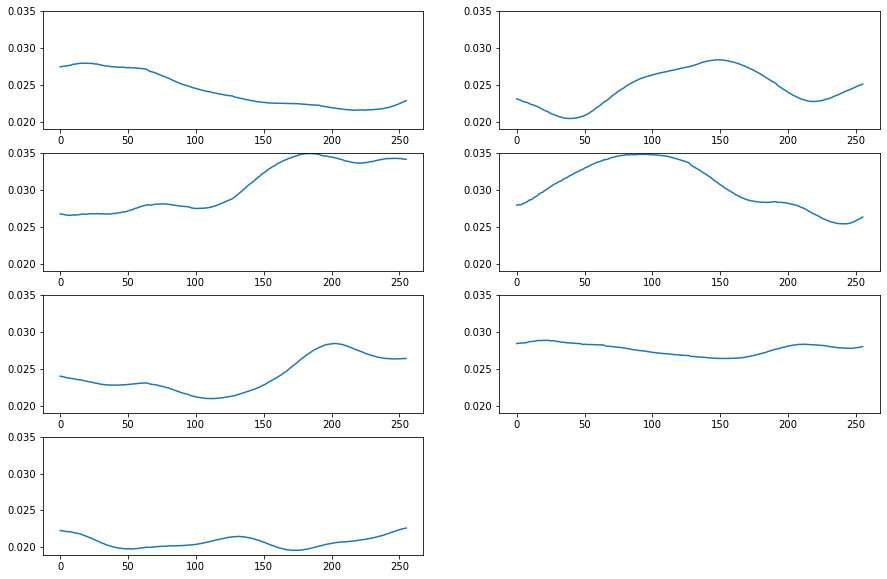

In [104]:
plt.gcf().set_size_inches((15,10))
for i in range(7):
    plt.subplot(4,2,i+1)
    plt.ylim((0.019,0.035))
    plt.plot(kmeans.cluster_centers_[i])

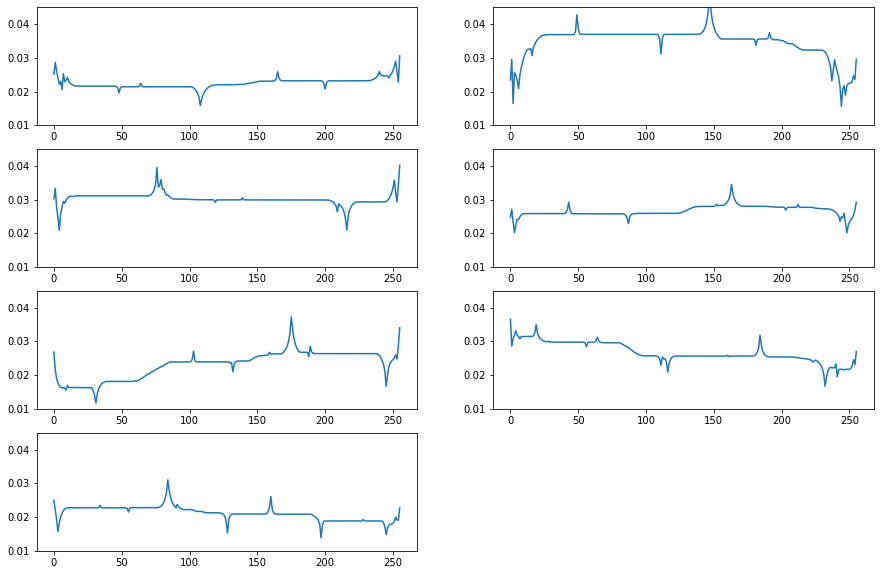

In [107]:
plt.gcf().set_size_inches((15,10))
for i in range(7):
    plt.subplot(4,2,i+1)
    plt.ylim((0.01,0.045))
    plt.plot(tsKmeansDtw.cluster_centers_[i])

In [122]:
from tslearn.metrics import dtw_path

In [129]:
L=dtw_path(szeregiWyg[0],tsKmeansDtw.cluster_centers_[5])[0]

/usr/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


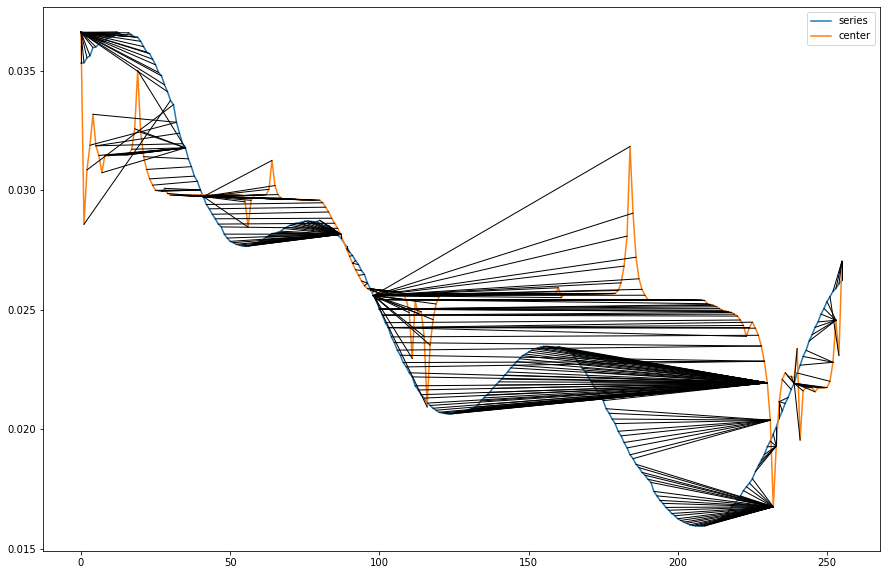

In [142]:
plt.gcf().set_size_inches((15,10))
#plt.xlim(0,50)
plt.plot(szeregiWyg[0], label="series")
plt.plot(tsKmeansDtw.cluster_centers_[5], label="center")
for x,y in L:
    plt.plot([x,y],[szeregiWyg[0][x],tsKmeansDtw.cluster_centers_[5][y]], "black",linewidth=1)
plt.legend()

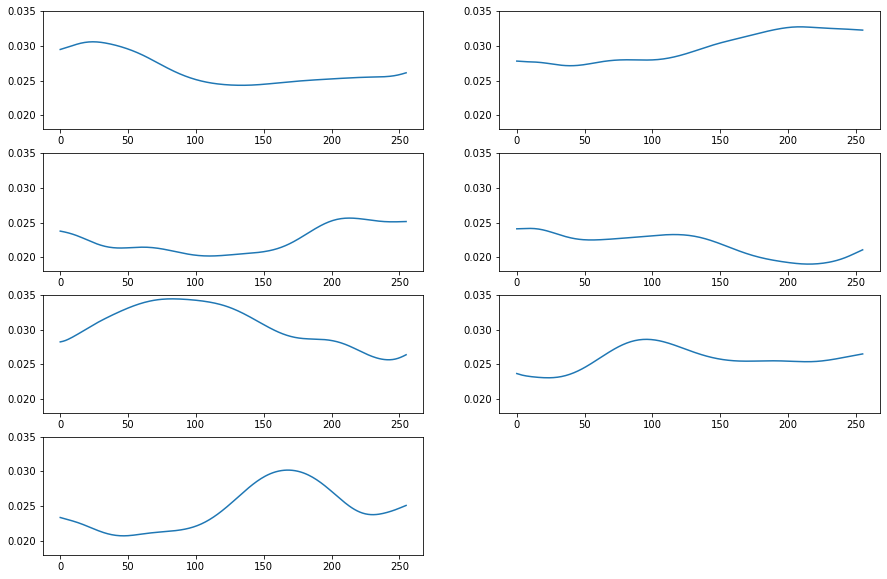

In [112]:
plt.gcf().set_size_inches((15,10))
for i in range(7):
    plt.subplot(4,2,i+1)
    plt.ylim((0.018,0.035))
    plt.plot(tsKmeans.cluster_centers_[i])